In [ ]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/Heez27/AICE_Associate/main/csv/delivery_time.csv"
delivery_df = pd.read_csv(url)
delivery_df.head()

,order_amount,num_items,distance_km,rider_experience,weather,order_time,promotion_applied,delivery_time_min
0,30.18,5,6.49,medium,rain,afternoon,N,26.5
1,33.76,1,9.17,low,fog,morning,N,26.4
2,97.96,2,11.80,low,fog,night,Y,37.1
3,99.36,5,10.67,high,snow,evening,N,45.0
4,99.55,5,5.81,high,snow,night,Y,20.0


<Axes: xlabel='weather', ylabel='delivery_time_min'>

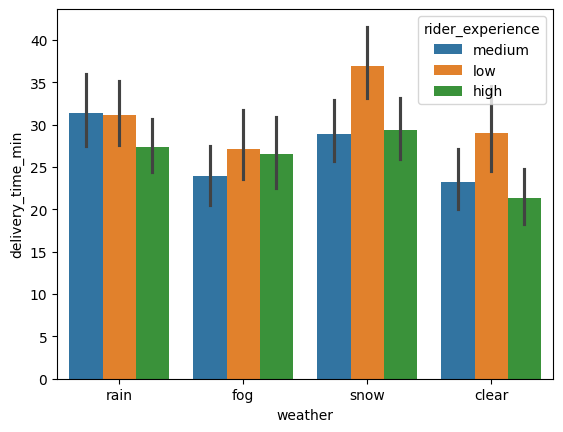

In [ ]:
sns.barplot(delivery_df, x="weather", y="delivery_time_min", hue = "rider_experience")

# 문제4. seaborn의 jointplot을 이용하여 배달시간(delivery_time_min)과 배달 거리(distance_km) 간을 분석하고 이상치를 제거하고자 한다.

x = distance_km

y = delivery_time_min

시각화를 통해 데이터를 확인 후, delivery_time이 100 이상인 이상치를 제거하고 del_df에 저장하시오.

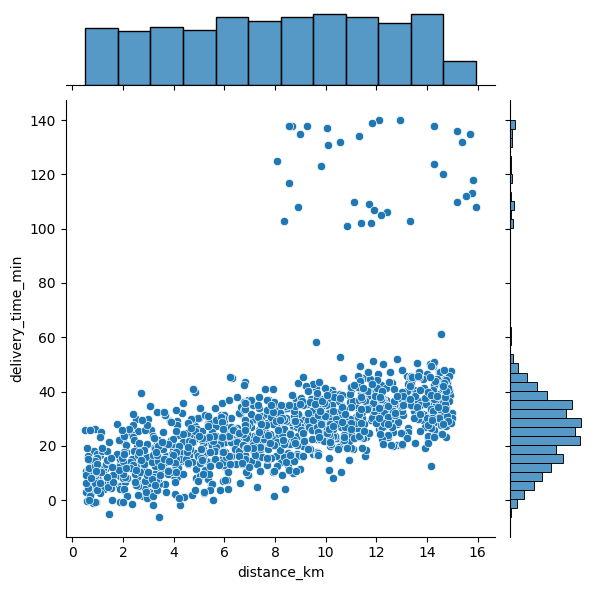

In [ ]:
sns.jointplot(data=delivery_df, x="distance_km", y="delivery_time_min")

In [ ]:
del_df = delivery_df.drop(delivery_df[delivery_df['delivery_time_min']>=100].index, axis=0)
del_df

,order_amount,num_items,distance_km,rider_experience,weather,order_time,promotion_applied,delivery_time_min
0,30.18,5,6.49,medium,rain,afternoon,N,26.5
1,33.76,1,9.17,low,fog,morning,N,26.4
2,97.96,2,11.80,low,fog,night,Y,37.1
3,99.36,5,10.67,high,snow,evening,N,45.0
4,99.55,5,5.81,high,snow,night,Y,20.0
...,...,...,...,...,...,...,...,...
1195,34.71,1,1.17,low,snow,night,N,19.4
1196,27.30,1,12.14,low,snow,morning,Y,38.1
1197,71.34,2,14.61,low,clear,evening,N,42.1
1198,27.79,1,7.37,low,fog,night,Y,25.3


# 문제5. delivery_time_min 데이터를 보니 값이 음수인 이상치가 포함됨. 잘못된 데이터 제거하고 데이터프레임의 인덱스도 초기화하기.

In [ ]:
del_df.drop(del_df[del_df['delivery_time_min']<0].index, axis = 0, inplace = True)

In [ ]:
del_df.reset_index(drop=True, inplace=True)
del_df

,order_amount,num_items,distance_km,rider_experience,weather,order_time,promotion_applied,delivery_time_min
0,30.18,5,6.49,medium,rain,afternoon,N,26.5
1,33.76,1,9.17,low,fog,morning,N,26.4
2,97.96,2,11.80,low,fog,night,Y,37.1
3,99.36,5,10.67,high,snow,evening,N,45.0
4,99.55,5,5.81,high,snow,night,Y,20.0
...,...,...,...,...,...,...,...,...
1148,34.71,1,1.17,low,snow,night,N,19.4
1149,27.30,1,12.14,low,snow,morning,Y,38.1
1150,71.34,2,14.61,low,clear,evening,N,42.1
1151,27.79,1,7.37,low,fog,night,Y,25.3


# 문제6. order_amount와 num_items 컬럼은 이번 분석에 필요하지 않은 정보. 이 두 컬럼을 삭제하기.

In [ ]:
del_df.drop(columns=['order_amount','num_items'], inplace=True)
del_df

,distance_km,rider_experience,weather,order_time,promotion_applied,delivery_time_min
0,6.49,medium,rain,afternoon,N,26.5
1,9.17,low,fog,morning,N,26.4
2,11.80,low,fog,night,Y,37.1
3,10.67,high,snow,evening,N,45.0
4,5.81,high,snow,night,Y,20.0
...,...,...,...,...,...,...
1148,1.17,low,snow,night,N,19.4
1149,12.14,low,snow,morning,Y,38.1
1150,14.61,low,clear,evening,N,42.1
1151,7.37,low,fog,night,Y,25.3


# 문제7. rider_experience, weather, order_time컬럼은 범주형 변수임. 이 세 컬럼을 get_dummies 사용해 원-핫 인코딩하기.

In [ ]:
cat_col = ['rider_experience', 'weather', 'order_time']

In [ ]:
encoding_df = pd.get_dummies(data = del_df, columns = cat_col, drop_first=True)
encoding_df

,distance_km,promotion_applied,delivery_time_min,rider_experience_low,rider_experience_medium,weather_fog,weather_rain,weather_snow,order_time_evening,order_time_morning,order_time_night
0,6.49,N,26.5,False,True,False,True,False,False,False,False
1,9.17,N,26.4,True,False,True,False,False,False,True,False
2,11.80,Y,37.1,True,False,True,False,False,False,False,True
3,10.67,N,45.0,False,False,False,False,True,True,False,False
4,5.81,Y,20.0,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1148,1.17,N,19.4,True,False,False,False,True,False,False,True
1149,12.14,Y,38.1,True,False,False,False,True,False,True,False
1150,14.61,N,42.1,True,False,False,False,False,True,False,False
1151,7.37,Y,25.3,True,False,True,False,False,False,False,True


# 문제8. promotion_applied 컬럼은 프로모션 적용 여부를 나타내는 이진 범주형 변수임. 모델에 적용하기 위해 해당 컬럼을 Label Encoding 방식으로 변환하기.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
encoding_df['promotion_applied'] = le.fit_transform(encoding_df['promotion_applied'])
encoding_df

,distance_km,promotion_applied,delivery_time_min,rider_experience_low,rider_experience_medium,weather_fog,weather_rain,weather_snow,order_time_evening,order_time_morning,order_time_night
0,6.49,0,26.5,False,True,False,True,False,False,False,False
1,9.17,0,26.4,True,False,True,False,False,False,True,False
2,11.80,1,37.1,True,False,True,False,False,False,False,True
3,10.67,0,45.0,False,False,False,False,True,True,False,False
4,5.81,1,20.0,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1148,1.17,0,19.4,True,False,False,False,True,False,False,True
1149,12.14,1,38.1,True,False,False,False,True,False,True,False
1150,14.61,0,42.1,True,False,False,False,False,True,False,False
1151,7.37,1,25.3,True,False,True,False,False,False,False,True


# 문제9.입력값X와 예측 대상y를 분리하기.
학습용과 테스트용 8:2 비율로 나누기

In [ ]:
from sklearn.model_selection import train_test_split
X = encoding_df.drop(columns=['delivery_time_min'])
y = encoding_df['delivery_time_min']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 문제10. 모델의 성능 향상을 위해 입력 데이터의 스케일을 맞출 필요있음. StandardScaler를 이용하여 X_train에 대해 학습(fit)한 뒤, X_train과 X_valid를 표준화하기.

StandardScaler 불러오기

X_train은 fit_transform을 이용하여 X_train 변수에 저장

X_valid는 transform을 이용하여 X_test 변수에 저장

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_valid)

# 문제11. 배송시간을 예측하기 위해 LinearRegression 모델을 생성하고 학습 데이터를 이용해 모델을 학습하기.

불러온 LinearRegression모델은 lr변수로 저장하기.

훈련은 스케일링 처리된 데이터 사용하기.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# 문제12. 배송 시간 예측을 위해 RandomFOrestRegressor 모델을 사용하자. 모델을 생성하고, 학습 데이터를 이용해 학습을 진행하기.

RandomForestRegressor모델을 rfr변수에 저장하기

n_estimators=100, max_depth=10, random_state=42

훈련은 스케일링 처리된 데이터를 사용하기.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

# 문제13. 배송 시간 예측위해 딥러닝 모델 사용. Sequential 모델을 설계하고, 학습 데이터를 이용해 모델 학습하기.

구조

Dense(64, relu)->BatchNormalization

Dense(32, relu)->BatchNormalization

Dense(16, relu)

Dense(1, linear)

optimizer: adam

loss: mean_squared_error

metric: mean_absolute_error

epochs=50

batch_size=128

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data = (X_valid, y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 794.2014 - mean_absolute_error: 25.8237 - val_loss: 769.3512 - val_mean_absolute_error: 25.3324
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 769.6653 - mean_absolute_error: 25.4126 - val_loss: 749.2183 - val_mean_absolute_error: 24.9786
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 750.9394 - mean_absolute_error: 25.0867 - val_loss: 738.9248 - val_mean_absolute_error: 24.7943
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 734.8244 - mean_absolute_error: 24.7997 - val_loss: 727.3120 - val_mean_absolute_error: 24.5841
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 719.7244 - mean_absolute_error: 24.5250 - val_loss: 712.4852 - val_mean_absolute_error: 24.3106
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 704.6316 - mean_absolute_error: 24.2492 - val_loss: 692.6782 - val_mean_absolute_error: 23.9425
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 689.1332 - mean_absolute_

# 문제14. 모델 학습 중 과적합을 방지하고, 가장 성능이 좋은 모델의 가중치를 저장하려 함. EarlyStopping과 ModelCheckpoint를 설정하여 모델을 학습하시오.

EarlyStopping: monitor='val_loss', patience=5

ModelCheckpoint: monitor='val_loss', save_best_only=True, 파일명 'best_model.h5

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=0)
modelcheckpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose = 1)
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data = (X_valid, y_valid), callbacks=[earlystopping,modelcheckpoint ])

Epoch 1/50
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 40.3357 - mean_absolute_error: 5.1464
Epoch 1: val_loss improved from inf to 1239.29761, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 44.9266 - mean_absolute_error: 5.3556 - val_loss: 1239.2976 - val_mean_absolute_error: 33.3485
Epoch 2/50
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.6929 - mean_absolute_error: 5.3510  
Epoch 2: val_loss did not improve from 1239.29761
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 44.7075 - mean_absolute_error: 5.3422 - val_loss: 1265.3641 - val_mean_absolute_error: 33.6982
